In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_excel(r"products_pricing1.xlsx")
df.shape

(7000, 10)

In [13]:
del df['Unnamed: 0']

In [14]:
df.head(1)

,price,condition,date,discount,merchant,brand,manufacturerNumber,name_article,weight
0,104.99,New,2017-03-30 06:00:00,False,Bestbuy.com,Sanus,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8 pounds


In [2]:
#Affichage des 5 premières lignes
df.head()

,price,condition,date,discount,merchant,brand,manufacturerNumber,name_article,weight
0,104.99,New,2017-03-30 06:00:00,False,Bestbuy.com,Sanus,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8 pounds
1,104.99,New,2017-03-10 22:00:00,False,Bestbuy.com,Sanus,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8 pounds
2,104.99,New,2017-03-04 10:00:00,False,Bestbuy.com,Sanus,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8 pounds
3,104.99,New,2017-03-03 14:00:00,False,Bestbuy.com,Sanus,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8 pounds
4,64.99,New,2017-12-14 06:00:00,True,Walmart.com,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds


In [15]:
#Ajout des colonnes 'day' et 'month'
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.weekday 
df['month'] = df['date'].dt.month

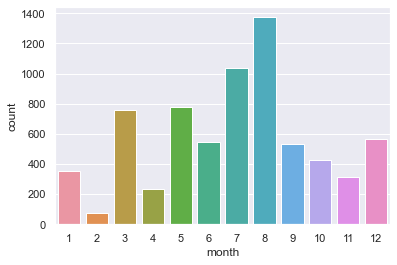

In [16]:
sns.set_theme()
#Le nombre d'achats par mois
sns.countplot(x='month', data = df);
#Juillet, Aout sont les mois avec les achats les plus importants. Oui cela semble coherent que des achats se fassent à la rentrée.

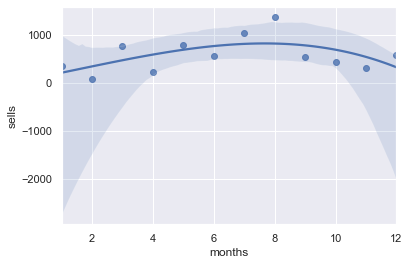

In [17]:
# On utilise value_counts pour calculer le nombre d'achats par mois

ventes_par_mois = df['month'].value_counts()

# convertir en dataFrame pour tracer la courbe
df_m = pd.DataFrame(ventes_par_mois)
df_m = df_m.reset_index()
df_m.columns = ['months', 'sells'] # On nomme les colonnes pour une meilleure lisibilité
ax = sns.regplot(x='months', y= 'sells', data=df_m, order=3) #On utilise regplot pour tracer la courbe de tendance


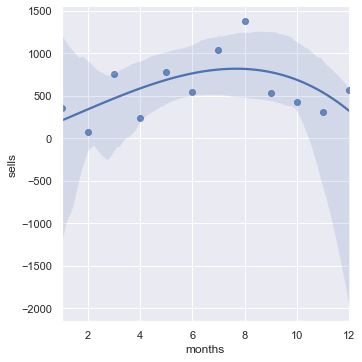

In [18]:
ax = sns.lmplot(x='months', y= 'sells', data=df_m, order=3) #On utilise regplot pour tracer la courbe de tendance


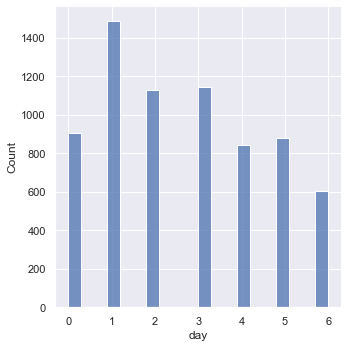

In [19]:
sns.displot(x='day', data = df);

In [20]:
df['name_article'].value_counts()
#.nlargest(25)


USB Type-C Digital AV Multiport Adapter              213
PLAY:3 Wireless Speaker (Black)                      163
Sony - RF995RK Wireless Over-the-Ear Headphone...    162
Sandisk Flash Mp3 Player 8gb - Pink (sdmx24008p)     149
Bose® - QuietComfort® 20 Headphones (Android) ...    141
                                                    ... 
Marantz - 1400W 7.2-Ch. 4K Ultra HD and 3D Pas...      2
Polk Audio - 50 W Woofer - Black                       1
Clarity - Super-Loud Phone Ringer - White              1
Klipsch - Reference Soundbar with 10 Wireless ...      1
Panamax - 2-Outlet Surge Protector - White             1
Name: name_article, Length: 204, dtype: int64

In [21]:
#Affichages des marques les plus dominantes
df['brand'].value_counts().nlargest(3)


Sony       740
Samsung    546
Apple      506
Name: brand, dtype: int64

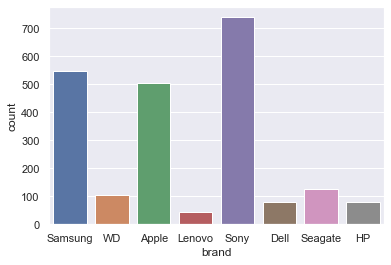

In [22]:
#Affichage du nombre d'achat des marques selectionnées

brands = ['Apple', 'Dell',  'HP',  'Lenovo', 'Samsung',  'Seagate',  'Sony',  'WD']
pop_brand_data = df['brand'].isin(brands)
df_b = df[pop_brand_data]
sns.countplot(x='brand', data = df_b);

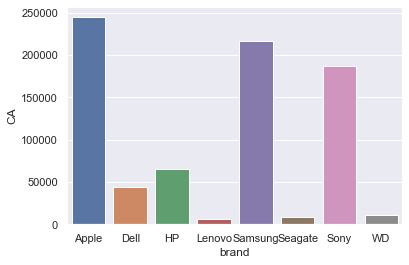

In [23]:
# On utilise groupby pour calculer les chiffres d'affaire et on l'affecte à Turnover
TO= df_b.groupby(by=['brand'], as_index = False)['price'].sum()
TO.columns= ['brand', 'CA'] #on renome la colonne calculée: 'CA' (chiffre d'affaire)
sns.barplot(x='brand', y='CA', data = TO);

#On constate que le nombre d'achats impacte le chiffre d'affaire, mais il n'est pas le seul facteur le prix des produits vendus 
#peut permettre à une marque de faire un CA plus élevé qu'un concurrent qui aurqit vendu plus de produits mais à des prix inférieurs.

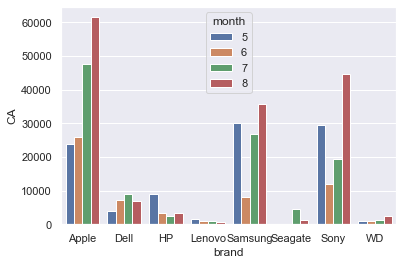

In [24]:
#Calcul des chiffres d'affaires par marque et par mois avec groupby et sum

Monthly_TO= df_b.groupby(by=['brand', 'month'], as_index = False)['price'].sum()
Monthly_TO.columns= ['brand', 'month', 'CA']
mois = [5,6,7,8] #pour créer unee liste des mois qui nous intéressent.
summer = Monthly_TO['month'].isin(mois)
Summer_TO = Monthly_TO[summer]
sns.barplot(x = 'brand', y = 'CA', hue= 'month', data = Summer_TO); #Pour chaque marque on separe les chiffres d'affaires respectifs par mois(grace à 'hue')  


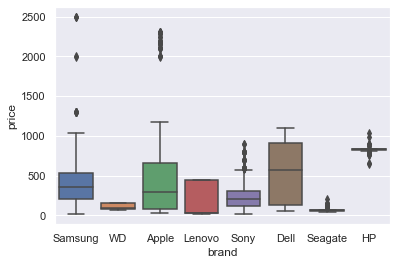

In [25]:
sns.boxplot(x='brand', y = 'price', data = df_b);